### Veri Kümesine Genel Bakış
İncelenecek veri kümesi, bir Portekiz bankacılık kurumunun telefon görüşmelerine dayalı olan doğrudan pazarlama kampanyaları ile ilgilidir. Çalışma, Mayıs 2008'den Kasım 2010'a kadar yapılan 41188 telefon görüşmesini içerir. Müşterilerin vadeli mevduatı kabul edip etmeyeceği bilgisine ulaşmak için çoğu kez aynı müşteriyle birden fazla kez irtibat kurma gereği doğmuştur. Veri kümesi dengesizdir, sadece 4640 görüşme (%11.26) başarıyla sonuçlanmıştır.

In [3]:
data <- read.csv("/Users/meryemcamir/Desktop/dataset/bank-additional.csv", header=TRUE, sep=";")

İlk olarak masaüstündeki "dataset" klasöründe bulunan **"bank-additional.csv"** isimli dosya programa okutulur ve 
oluşan veri çerçevesi **"data"** adındaki değişkene atanır. **"header=TRUE"** veri çerçevesindeki ilk satırın, sütunların adıyla oluşturulan bir başlık olmasını sağlar.

$$30;blue-collar;married;basic.9y;no;yes;no;cellular;may;fri;487;2;999;0;nonexistent;-1.8;92.893;-46.2;1.313;5099.1;no$$

Veri kümesinden alınan yukarıdaki örnekte görüldüğü üzere dosyanın her bir satırındaki değerler "**;**" karakteri ile birbirinden ayrılmıştır.<br>
**sep=";"** ile ayrım yerlerinin program tarafından tanınması sağlanır.

Aşağıda **head** fonksiyonu aracılığıyla veri çerçevesinin baştaki satırlarından oluşturulmuş bir önizleme görülmektedir:

In [4]:
head(data)

age,job,marital,education,default,housing,loan,contact,month,day_of_week,⋯,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,⋯,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
39,services,single,high.school,no,no,no,telephone,may,fri,⋯,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
25,services,married,high.school,no,yes,no,telephone,jun,wed,⋯,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,⋯,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,⋯,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
32,services,single,university.degree,no,no,no,cellular,sep,thu,⋯,3,999,2,failure,-1.1,94.199,-37.5,0.884,4963.6,no


Bu veri kümesi, ileride test için kullanılacak olan **"bank-additional-full.csv"** isimli kümedeki örneklerin rastgele seçilmesiyle oluşturulmuştur ve örneklerin %10'unu içerir.

### Değişkenler
***Müşteri Bilgileri***
<ol>
<li>**age:** Müşterilerin yaşlarından oluşmuştur. 17 ile 98 arasında değerler alır ve numerik tiptedir.</li><br>
<li>**job:** Müşterilerin mesleklerini belirtir.<br>
Kategoriler: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'selfemployed', 'services', 'student', 'technician', 'unemployed', 'unknown'.</li><br>
<li>**marital:** Müşterilerin medeni halini gösterir.<br>
Kategoriler: 'divorced'<sup>\*</sup>, 'married', 'single', 'unknown'.</li><br>
<li>**education:** Müşterilerin eğitim durumlarını gösterir.<br> 
Kategoriler: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown'.</li><br>
<li>**default:**</li>

<li>**housing:** Müşterinin konut kredisi sahibi olup olmadığını belirtir.<br>
Kategoriler: 'no', 'yes', 'unknown'.</li><br>

<li>**loan:** Müşterinin bireysel kredi kullanıp kullanmadığını gösterir.<br>
Kategoriler: 'no', 'yes', 'unknown'.</li></ol><br>

***Son Telefon Görüşmesine İlişkin Bilgiler***<br>
<ol start=8>
<li><b>contact:</b> Müşteri ile kurulan iletişimin cep telefonu üzerinden mi yoksa karasal hat üzerinden mi gerçekleştiğini gösterir.<br>
Kategoriler: 'cellular', 'telephone'.</li><br>
<li> **month:** Müşteri ile son iletişime geçilen ayı gösterir.<br>
Kategoriler: 'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'.</li><br>
<li> **day_of_week:** Müşteri ile son iletişime geçilen hafta içi gününü belirtir.<br>
Kategoriler: 'mon', 'tue', 'wed', 'thu', 'fri'.</li><br>
<li> **duration:** Son iletişimin süresini saniye cinsinden gösterir. 0 ile 4918 arasında değerler alır. Numerik tipte bir değişkendir.</li></ol><br>

***Diğer Özellikler***<br>
<ol start=12>
<li>**campaign:** Bu kampanya süresince müşteri ile kurulan irtibat sayısını gösterir, numerik tiptedir. 1 ile 56 arasında değerler alır.</li><br>
<li>**pdays:** Müşteri ile bir önceki kampanya esnasındaki son görüşmeden itibaren geçen gün sayısını gösterir. Numeriktir. Müşteri ile daha öncesinde herhangi bir iletişime geçilmemişse *999* değerini alır.</li><br>
<li>**previous:** Bu kampanyadan önce müşteri ile yapılan görüşme sayısını belirtir. Numeriktir ve 0 ile 7 arasında değişir.</li><br>
<li>**poutcome:** Önceki kampanyanın başarıya ulaşıp ulaşmadığını gösterir.<br>
Kategoriler: 'failure', 'nonexistent', 'success'.</li></ol><br>

***Sosyal ve Ekonomik Özellikler***<br>
<ol start=16>
<li> **emp.var.rate:** İstihdam varyasyon oranını gösterir ve numeriktir.</li><br>
<li>**cons.price.idx:** Aylık tüketici fiyatları endeksini (TÜFE) gösterir. Numeriktir.</li><br> 
<li>**cons.conf.idx:** Aylık tüketici güven endeksini gösterir. Numeriktir.</li><br>
<li>**euribor3m:** AB'deki bankalar arası geriye dönük üç aylık faiz oranının günlük ortalama karşılığını belirtir. Numeriktir.</li><br>
<li>**nr.employed:** Çalışan sayısını (üç aylık gösterge) belirtir. Numeriktir.</li></ol><br>

***Sonuç Değişkeni***<br>
<ol start=21>
<li> **y:** Müşteri vadeli mevduat açtırmış mı?<br>
Kategoriler: 'yes', 'no'.</li></ol><br>
<sup>\*</sup> *'divorced' kategorisinin içerisinde hem boşanmış olanlar hem de eşleri vefat edenler yer almaktadır.*

### Lojistik Regresyon
#### Giriş
Regresyon analizi, herhangi bir değişkenin bir veya birden fazla değişkenle arasındaki ilişkiyi ölçmek için kullanılan analiz yöntemidir.

Bir vakada iki ana değişken vardır: bağımlı değişken ve bağımsız değişken. Bağımlı değişken sayısı tektir ancak bağımsız değişken sayısı birden fazla olabilir.

**Bağımsız değişken** (açıklayıcı değişken) bağımlı değişkeni etkilediği düşünülen sebep değişkenidir. 

**Bağımlı değişken** (cevap değişkeni) vakadaki bağımsız değişkenlerden etkilenen, test edilen ve ölçülen değişkendir. 

*Burada incelenen veri kümesindeki ilk yirmi değişken bağımsız değişkenlerdir. Yirmi birinci değişken olan $y$, bağımlı değişkendir. Amaç bağımsız değişkenlerin ışığı altında $y$ değişkeninin yanıtına ulaşmaktır.*

Lineer regresyon, veri kümesinde normal dağılım ister. Ayrıca hem bağımlı değişken hem de bağımsız değişkenler nicel olmalıdır. Örneğin, yaş ile kan basıncı arasında bir ilişki saptanacaksa hem yaş hem de kan basıncı sayısal olarak belirtilmelidir. Ancak gerçek hayatta çoğu zaman nitel değişkenlerle karşılaşılır.

Lojistik regresyon ise cevap değişkeninin kategorik ve çoklu; bağımsız değişkenlerin numerik veya kategorik olabildiği bir regresyon çeşididir. Bağımlı değişkenin kategori sayısına göre uygulanacak yöntem farklıdır. 

Binomial| Multinomial| Ordinal
:---: | --- | ---
2 kategori | 2+ kategori<br>*sırasız*| 2+ kategori<br>*sıralı* 
etkili - etkisiz<br>evet - hayır<br>iyileşti - iyileşmedi  | çalışıyor - çalışmıyor - emekli | çok etkili - orta derecede etkili - az etkili

Lojistik regresyon, 1958'de İngiliz istatistikçi David Cox tarafından geliştirilmiştir. Tıp, sosyal bilimler, mühendislik, makine öğrenimi gibi birçok alanda lojistik regresyondan yararlanılır. Örneğin, yaralıların ölüm oranının tahmin edilmesinde kullanılan "Travma ve Yaralanma Şiddeti Skoru" lojistik regresyon kullanılarak geliştirilmiştir. Bir seçmenin yaşı, gelir düzeyi, cinsiyeti, ikamet ettiği yer, önceki seçimlerdeki oyları gibi kategorilere bakılarak bir sonraki seçimde sağ kesime mi yoksa sol kesime mi yönelik oy kullanacağının tahmin edilmesi de bir başka kullanım alanı örneğidir. Pazarlama alanındaki kullanımına ise bir müşterinin bir ürünü veya hizmeti satın alacağının ya da üyeliğini durduracağının öngörülmesi örnek olarak verilebilir.

Lojistik fonksiyon $t\in\mathbb{R}$, &nbsp; $f(t)\in(0,1)$ için

$$f(t) = \frac{e^t}{e^t + 1} = \frac{1}{1 + e^{-t}}$$ 

şeklinde tanımlanır. Kolaylık açısından $t$'nin tek bir bağımsız değişkene ait lineer bir fonksiyon olduğu kabul edilsin: 

$$t = \beta_0 + \beta^Tx \mbox{ .} $$

Artık lojistik fonksiyon

$$p(x) = \frac{e^{\beta_0 + \beta^Tx}}{1 + e^{\beta_0 + \beta^Tx}} \textrm{ veya } \mbox{ } p(x) = \frac{1}{1 + e^{-(\beta_0 + \beta^Tx)}}$$

şeklinde yazılabilir.


$1,2...,K$ şeklinde devam eden $K$ tane sınıf olduğunu farz edelim, $k$ ile gösterilen cevap değişkeni için uygun lineer model $	\hat{f}_k(x) = \hat{\beta}_{k0} + \hat{\beta}^T_kx$ 'tir.<br>

Eğer iki adet sınıf $(K=2)$ varsa sonsal olasılık:

$$Pr(G=1 | X=x) = \frac{e^{\beta_0 + \beta^Tx}}{1 + e^{\beta_0 + \beta^Tx}} \mbox{ ,}$$

$$Pr(G=2 | X=x) = \frac{1}{1 + e^{\beta_0 + \beta^Tx}} \mbox{ .}$$

Bu iki denklemin oranının doğal logaritması alınırsa

$$ln(\frac{p(x)}{1-p(x)}) = ln(\frac{Pr(G=1 | X=x)}{Pr(G=2 | X=x)}) = \beta_0 + \beta^Tx$$

lineer denklemi elde edilir.



In [1]:
dataNumeric <- data[c(1,11,12,13,14,16:20)]
cor(dataNumeric)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.0000000000,0.04129858,-0.014169150,-0.04342483,0.05093104,-0.01919176,-0.0004819963,0.098135199,-0.01503288,-0.04193615
duration,0.0412985752,1.00000000,-0.085348013,-0.04699821,0.02572418,-0.02884831,0.0166722553,-0.034744748,-0.03232899,-0.04421756
campaign,-0.0141691499,-0.08534801,1.000000000,0.05874163,-0.09148987,0.17607871,0.1450207792,0.007882403,0.15943531,0.16103686
pdays,-0.0434248272,-0.04699821,0.058741625,1.00000000,-0.58794114,0.27068388,0.0584719199,-0.092089964,0.30147800,0.38198311
previous,0.0509310356,0.02572418,-0.091489869,-0.58794114,1.00000000,-0.41523813,-0.1649219571,-0.051420341,-0.45885135,-0.51485341
emp.var.rate,-0.0191917634,-0.02884831,0.176078710,0.27068388,-0.41523813,1.00000000,0.7551545557,0.195021904,0.97030796,0.89717322
cons.price.idx,-0.0004819963,0.01667226,0.145020779,0.05847192,-0.16492196,0.75515456,1.0000000000,0.045834979,0.65715937,0.47255976
cons.conf.idx,0.0981351994,-0.03474475,0.007882403,-0.09208996,-0.05142034,0.19502190,0.0458349788,1.000000000,0.27659517,0.10705420
euribor3m,-0.0150328845,-0.03232899,0.159435309,0.30147800,-0.45885135,0.97030796,0.6571593688,0.276595165,1.00000000,0.94258928
nr.employed,-0.0419361520,-0.04421756,0.161036860,0.38198311,-0.51485341,0.89717322,0.4725597632,0.107054204,0.94258928,1.00000000


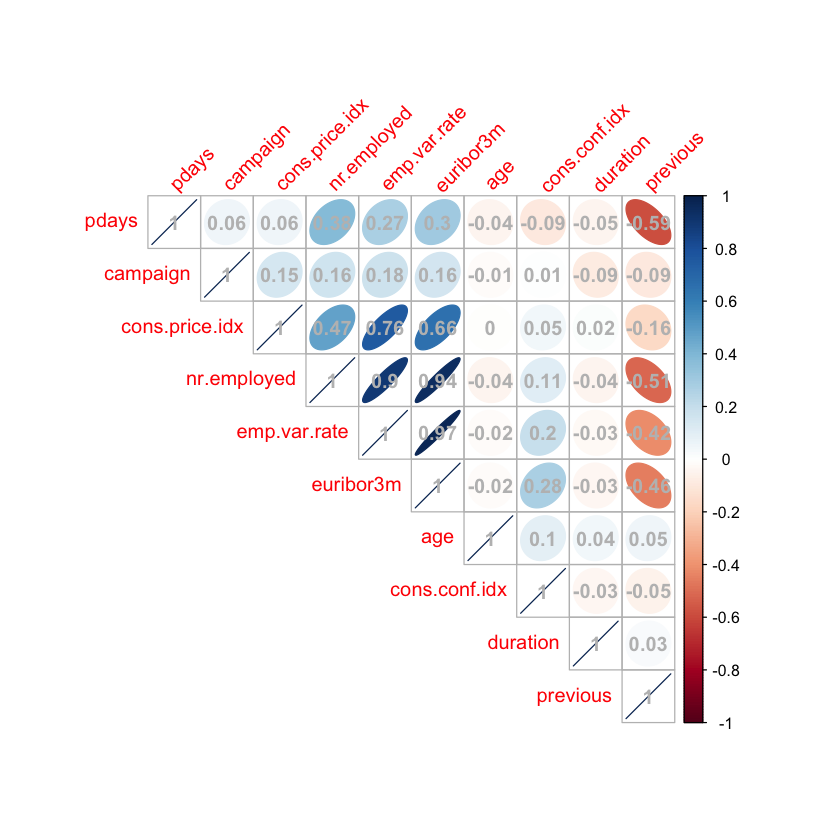

In [3]:
library(corrplot)
forcorrplot <- cor(dataNumeric)
corrplot(forcorrplot, type = "upper", method = "ellipse", order = "hclust", addCoef.col = "gray", tl.srt = 45)

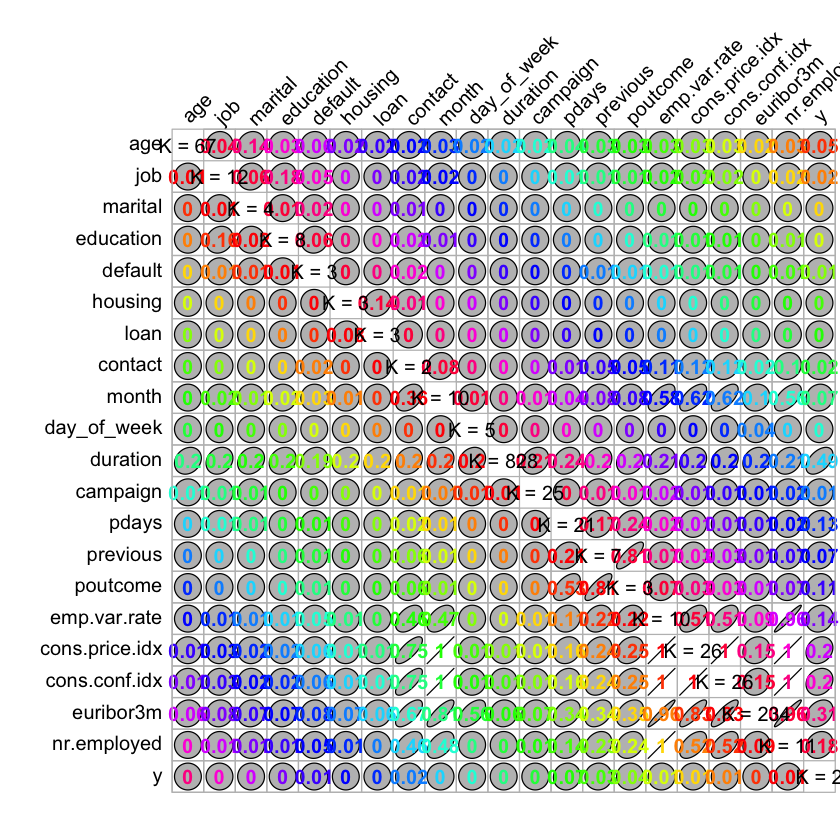

In [4]:
library(GoodmanKruskal)
matrix <- GKtauDataframe(data)
plot(matrix)

In [2]:
model <- glm(y ~ cons.price.idx * month, family = binomial("logit"), data=data)
summary(model)


Call:
glm(formula = y ~ cons.price.idx * month, family = binomial("logit"), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4533  -0.4285  -0.4168  -0.3139   2.4637  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)             -3.403e+02  8.222e+01  -4.139 3.49e-05 ***
cons.price.idx           3.636e+00  8.826e-01   4.120 3.79e-05 ***
monthaug                 4.225e+02  8.535e+01   4.950 7.43e-07 ***
monthdec                 2.805e+04  7.002e+05   0.040 0.968039    
monthjul                 3.181e+02  1.064e+02   2.990 0.002789 ** 
monthjun                 4.829e+02  8.429e+01   5.730 1.01e-08 ***
monthmar                 2.436e+02  1.333e+02   1.827 0.067745 .  
monthmay                 3.923e+02  8.434e+01   4.651 3.30e-06 ***
monthnov                 2.780e+02  8.736e+01   3.182 0.001464 ** 
monthoct                 3.362e+02  8.556e+01   3.929 8.52e-05 ***
monthsep                 3.091e+02  8.6

In [3]:
summary(data$month)

apr  aug  dec  jul  jun  mar  may  nov  oct  sep 
 215  636   22  711  530   48 1378  446   69   64